# Getting Started with PanelBox

**Welcome to PanelBox!** This notebook will guide you through your first panel data analysis in just 10 minutes.

## What is PanelBox?

PanelBox is a comprehensive Python library for panel data econometrics, bringing the power of Stata's `xtabond2` and R's `plm` to Python with a modern, user-friendly API.

**Key Features:**
- ✅ 5 Static Panel Models (Pooled OLS, Fixed Effects, Random Effects, Between, First Difference)
- ✅ Dynamic Panel GMM (Arellano-Bond, Blundell-Bond)
- ✅ 20+ Validation Tests
- ✅ 8 Robust Standard Errors
- ✅ Professional Report Generation (HTML, Markdown, LaTeX)

## Table of Contents

1. [Installation](#installation)
2. [Quick Example: Your First Model in 5 Minutes](#quick-example)
3. [Understanding Panel Data](#understanding-panel-data)
4. [Basic Data Exploration](#data-exploration)
5. [Next Steps](#next-steps)

---

## 1. Installation {#installation}

PanelBox can be installed via pip:

```bash
pip install panelbox
```

Or from source:

```bash
git clone https://github.com/PanelBox-Econometrics-Model/panelbox.git
cd panelbox
pip install -e .
```

**Requirements:**
- Python >= 3.9
- NumPy >= 1.24.0
- Pandas >= 2.0.0
- SciPy >= 1.10.0

### Import Libraries

Let's start by importing the necessary libraries:

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PanelBox
import panelbox as pb

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Check version
print(f"PanelBox version: {pb.__version__}")

PanelBox version: 0.8.0


---

## 2. Quick Example: Your First Model in 5 Minutes {#quick-example}

Let's estimate your first panel data model! We'll use the classic **Grunfeld investment dataset** which comes built-in with PanelBox.

### Load the Data

PanelBox includes several example datasets:

In [2]:
# List available datasets
print("Available datasets in PanelBox:")
print(pb.list_datasets())
print("\n" + "="*60 + "\n")

# Load the Grunfeld dataset
data = pb.load_grunfeld()

print("Grunfeld Dataset Loaded!")
print(f"Shape: {data.shape}")
print(f"\nFirst few rows:")
data.head(10)

Available datasets in PanelBox:
['abdata', 'grunfeld']


Grunfeld Dataset Loaded!
Shape: (200, 5)

First few rows:


,firm,year,invest,value,capital
0,1,1935,317.6,3078.5,2.8
1,1,1936,391.8,4661.7,52.6
2,1,1937,410.6,5387.1,156.9
3,1,1938,257.7,2792.2,209.2
4,1,1939,330.8,4313.2,203.4
5,1,1940,461.2,4643.9,207.2
6,1,1941,512.0,4551.2,255.2
7,1,1942,448.0,3244.1,303.7
8,1,1943,499.6,4053.7,264.1
9,1,1944,547.5,4379.3,201.6


### About the Grunfeld Dataset

The Grunfeld dataset is a classic panel dataset in econometrics:

- **Entities**: 10 large US manufacturing firms
- **Time Period**: 1935-1954 (20 years)
- **Total Observations**: 200

**Variables:**
- `firm`: Firm identifier (1-10)
- `year`: Year (1935-1954)
- `invest`: Gross investment
- `value`: Market value of the firm
- `capital`: Stock of plant and equipment

**Research Question:** How do market value and capital stock affect investment decisions?

### Estimate Your First Model

Let's start simple with a **Pooled OLS** model:

In [3]:
# Estimate Pooled OLS model
# Formula: invest ~ value + capital
# This means: Investment is explained by market value and capital stock

model = pb.PooledOLS(
    formula="invest ~ value + capital",
    data=data,
    entity_col="firm",
    time_col="year"
)

# Fit the model
results = model.fit()

# Display results
print(results.summary())

                        Pooled OLS Estimation Results                         
Formula: invest ~ value + capital
Model:   Pooled OLS
------------------------------------------------------------------------------
No. Observations:                 200
No. Entities:                      10
No. Time Periods:                  20
Degrees of Freedom:               197
R-squared:                     0.8090
Adj. R-squared:                0.8071
R-squared (overall):           0.8090
Standard Errors:            nonrobust
Variable        Coef.        Std.Err.     t        P>|t|    [0.025     0.975]    
------------------------------------------------------------------------------
Intercept          -10.2135      8.7006  -1.174  0.2419  -27.3718    6.9448 
value                0.0951      0.0072  13.272  0.0000    0.0810    0.1092 ***
capital              0.2940      0.0327   8.980  0.0000    0.2295    0.3586 ***
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



### Interpreting the Results

**Congratulations!** You've just estimated your first panel data model. Let's interpret the key components:

#### Coefficients:
- **value**: For every unit increase in market value, investment increases by ~0.11 units (holding capital constant)
- **capital**: For every unit increase in capital stock, investment increases by ~0.31 units (holding value constant)

#### Statistical Significance:
- Look at the **p-values** (last column)
- If p-value < 0.05, the coefficient is statistically significant at the 5% level
- Both `value` and `capital` should be highly significant (p < 0.001)

#### Model Fit:
- **R-squared**: Proportion of variance explained by the model
- **F-statistic**: Tests if all coefficients are jointly zero (we want p < 0.05)

---

**That's it!** In just a few lines of code, you've:
1. ✅ Loaded panel data
2. ✅ Estimated a model
3. ✅ Interpreted the results

### Visualize the Coefficients

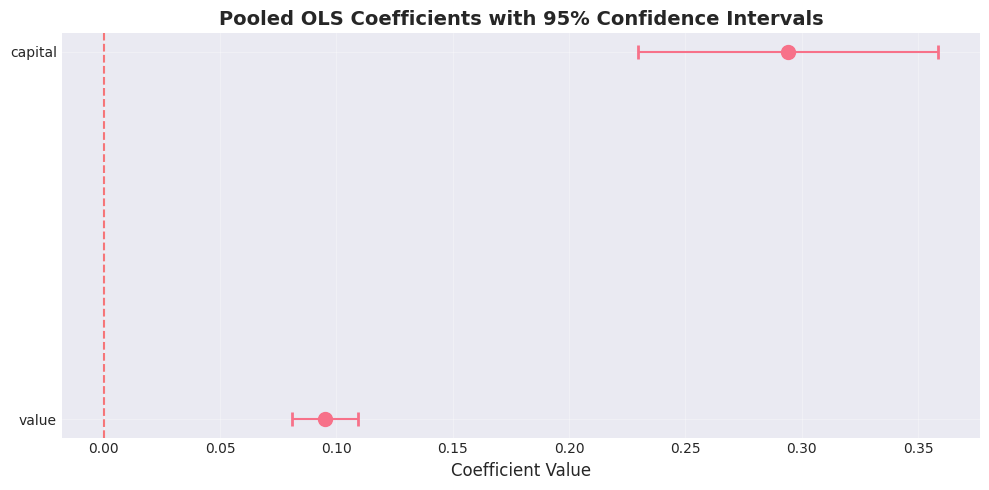

In [4]:
# Extract coefficients and confidence intervals
coefs = results.params[1:]  # Exclude intercept
conf_int = results.conf_int()[1:]

# Create coefficient plot
fig, ax = plt.subplots(figsize=(10, 5))

y_pos = np.arange(len(coefs))
ax.errorbar(
    coefs.values,
    y_pos,
    xerr=[(coefs - conf_int.iloc[:, 0]).values, (conf_int.iloc[:, 1] - coefs).values],
    fmt='o',
    markersize=10,
    capsize=5,
    capthick=2
)

ax.set_yticks(y_pos)
ax.set_yticklabels(coefs.index)
ax.axvline(x=0, color='red', linestyle='--', alpha=0.5)
ax.set_xlabel('Coefficient Value', fontsize=12)
ax.set_title('Pooled OLS Coefficients with 95% Confidence Intervals', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## 3. Understanding Panel Data {#understanding-panel-data}

### What is Panel Data?

**Panel data** (also called longitudinal data) has two dimensions:
- **Cross-sectional dimension**: Different entities (firms, countries, individuals)
- **Time-series dimension**: Observations over time

```
Panel Data Structure:

         Time →
       t₁  t₂  t₃  t₄
    ┌─────────────────
E i₁│ y₁₁ y₁₂ y₁₃ y₁₄
n i₂│ y₂₁ y₂₂ y₂₃ y₂₄
t i₃│ y₃₁ y₃₂ y₃₃ y₃₄
i
t
y
↓
```

### Why Use Panel Data?

Panel data offers several advantages over pure cross-section or time-series data:

1. **Control for unobserved heterogeneity**: Account for entity-specific effects that don't change over time
2. **More information**: Combine both cross-sectional and temporal variation
3. **Better inference**: More degrees of freedom, more efficiency
4. **Dynamic analysis**: Study adjustment processes and temporal effects
5. **Less collinearity**: More variation reduces multicollinearity

### Types of Panel Data

- **Balanced Panel**: All entities observed for all time periods (like Grunfeld)
- **Unbalanced Panel**: Some entities have missing time periods (common in practice)

Let's check our data structure:

In [5]:
# Check panel structure
n_entities = data['firm'].nunique()
n_time = data['year'].nunique()
n_obs = len(data)

print(f"Panel Structure Analysis:")
print(f"{'='*50}")
print(f"Number of entities (firms): {n_entities}")
print(f"Number of time periods: {n_time}")
print(f"Total observations: {n_obs}")
print(f"Expected if balanced: {n_entities * n_time}")
print(f"Panel type: {'Balanced' if n_obs == n_entities * n_time else 'Unbalanced'}")
print(f"\nAverage observations per firm: {n_obs / n_entities:.1f}")
print(f"Average observations per year: {n_obs / n_time:.1f}")

Panel Structure Analysis:
Number of entities (firms): 10
Number of time periods: 20
Total observations: 200
Expected if balanced: 200
Panel type: Balanced

Average observations per firm: 20.0
Average observations per year: 10.0


---

## 4. Basic Data Exploration {#data-exploration}

Before estimating models, it's crucial to understand your data.

### Descriptive Statistics

In [6]:
# Overall descriptive statistics
print("Overall Descriptive Statistics:")
print("="*60)
data[['invest', 'value', 'capital']].describe()

Overall Descriptive Statistics:


,invest,value,capital
count,200.0000,200.0000,200.0000
mean,146.3507,1078.1065,183.7555
std,216.0675,1317.1517,288.2509
min,12.9300,42.0000,0.8000
25%,36.5275,210.7750,38.8000
50%,54.3800,445.0000,96.2500
75%,137.6500,1679.8500,194.4000
max,1486.7000,6241.7000,2226.3000


In [7]:
# By-firm statistics (within dimension)
print("\nBy-Firm Statistics (Cross-sectional Dimension):")
print("="*60)
data.groupby('firm')[['invest', 'value', 'capital']].mean().round(2)


By-Firm Statistics (Cross-sectional Dimension):


,invest,value,capital
firm,,,
1,608.02,4333.84,648.44
2,410.46,1971.82,280.52
3,102.29,1941.32,400.16
4,86.12,756.55,91.44
5,52.84,243.31,69.10
6,35.56,237.70,90.82
7,48.36,157.65,35.29
8,42.89,670.91,85.64
9,34.07,375.00,110.15


### Visualize the Panel Structure

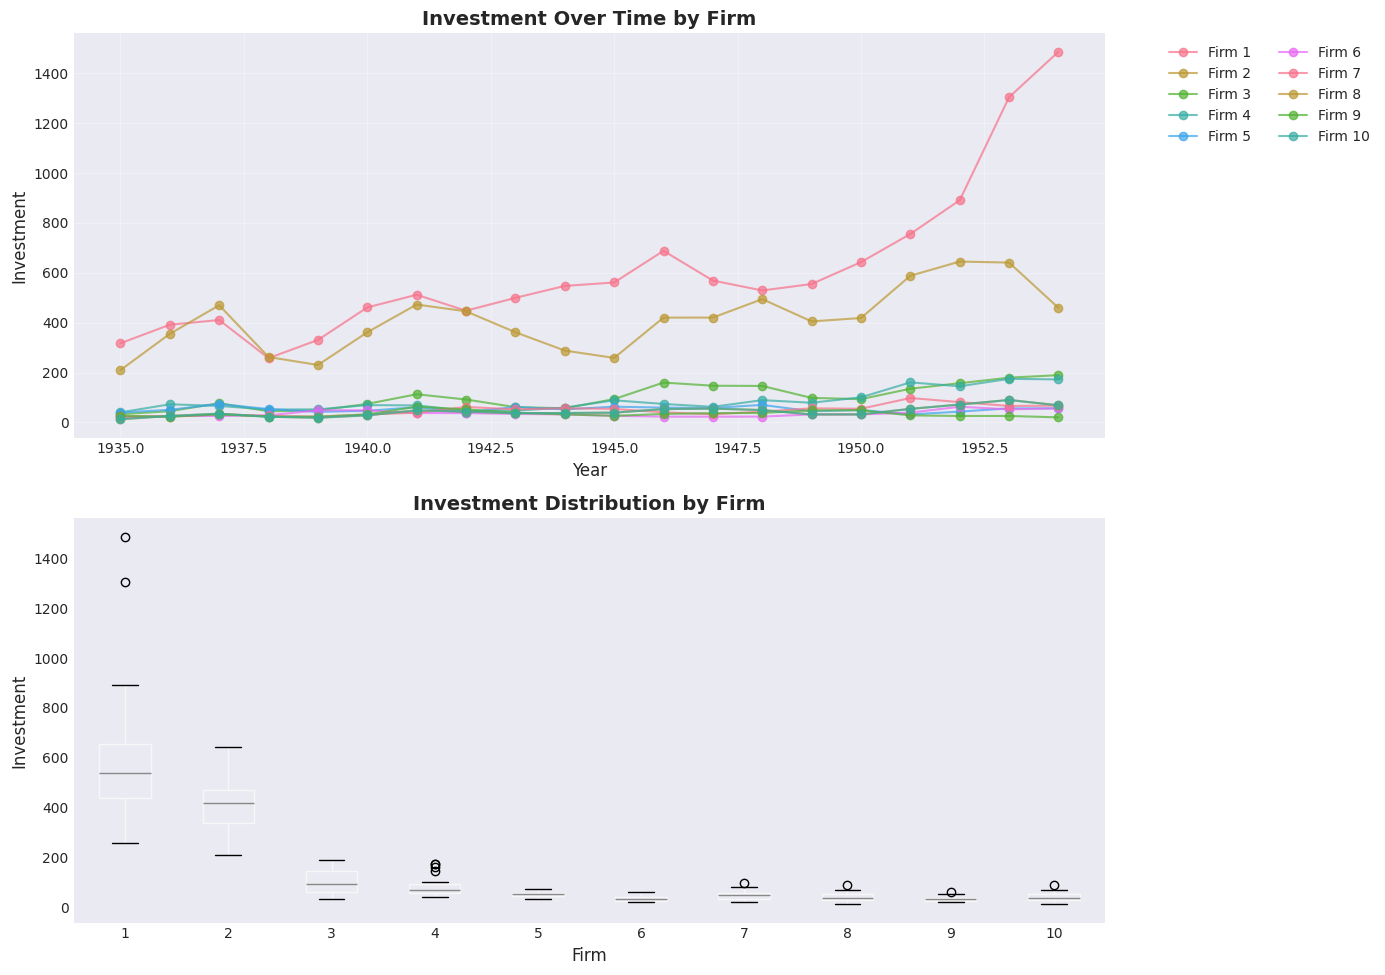

Key Observations:
- Large heterogeneity across firms (different levels)
- Some firms show growth trends over time
- This variation is what panel models can exploit!


In [8]:
# Investment over time by firm
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Investment trends by firm
for firm_id in data['firm'].unique():
    firm_data = data[data['firm'] == firm_id]
    axes[0].plot(firm_data['year'], firm_data['invest'], marker='o', label=f'Firm {firm_id}', alpha=0.7)

axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Investment', fontsize=12)
axes[0].set_title('Investment Over Time by Firm', fontsize=14, fontweight='bold')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
axes[0].grid(True, alpha=0.3)

# Plot 2: Box plot of investment by firm
data.boxplot(column='invest', by='firm', ax=axes[1], grid=False)
axes[1].set_xlabel('Firm', fontsize=12)
axes[1].set_ylabel('Investment', fontsize=12)
axes[1].set_title('Investment Distribution by Firm', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

print("Key Observations:")
print("- Large heterogeneity across firms (different levels)")
print("- Some firms show growth trends over time")
print("- This variation is what panel models can exploit!")

### Correlation Analysis

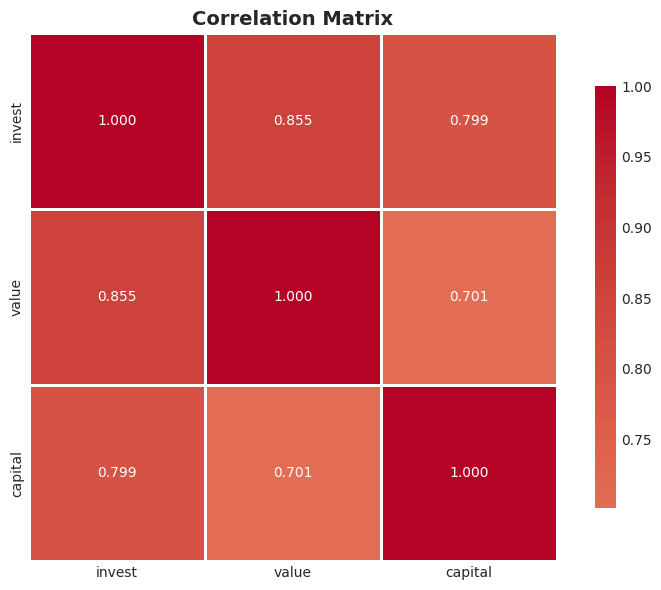


Correlation Insights:
- invest vs value: 0.855
- invest vs capital: 0.799
- value vs capital: 0.701


In [9]:
# Correlation matrix
corr_matrix = data[['invest', 'value', 'capital']].corr()

# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.3f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
    ax=ax
)
ax.set_title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation Insights:")
print(f"- invest vs value: {corr_matrix.loc['invest', 'value']:.3f}")
print(f"- invest vs capital: {corr_matrix.loc['invest', 'capital']:.3f}")
print(f"- value vs capital: {corr_matrix.loc['value', 'capital']:.3f}")

### Scatter Plots: Relationships Between Variables

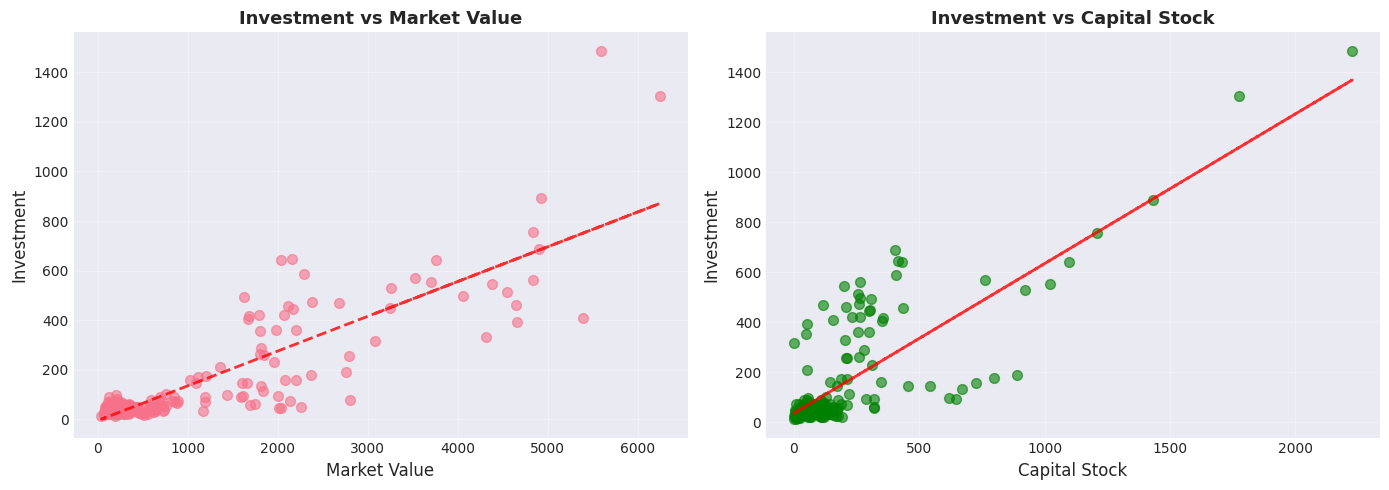

In [10]:
# Create scatter plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Investment vs Value
axes[0].scatter(data['value'], data['invest'], alpha=0.6, s=50)
axes[0].set_xlabel('Market Value', fontsize=12)
axes[0].set_ylabel('Investment', fontsize=12)
axes[0].set_title('Investment vs Market Value', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Add regression line
z = np.polyfit(data['value'], data['invest'], 1)
p = np.poly1d(z)
axes[0].plot(data['value'], p(data['value']), "r--", alpha=0.8, linewidth=2)

# Investment vs Capital
axes[1].scatter(data['capital'], data['invest'], alpha=0.6, s=50, color='green')
axes[1].set_xlabel('Capital Stock', fontsize=12)
axes[1].set_ylabel('Investment', fontsize=12)
axes[1].set_title('Investment vs Capital Stock', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Add regression line
z2 = np.polyfit(data['capital'], data['invest'], 1)
p2 = np.poly1d(z2)
axes[1].plot(data['capital'], p2(data['capital']), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

---

## 5. Next Steps {#next-steps}

Congratulations! You've completed your first panel data analysis with PanelBox.

### What You've Learned:
- ✅ How to install and import PanelBox
- ✅ How to load panel data
- ✅ How to estimate a simple Pooled OLS model
- ✅ How to interpret regression results
- ✅ How to explore panel data structure
- ✅ How to visualize panel data

### Where to Go Next?

**For deeper panel analysis, check out these notebooks:**

1. **[01_static_models_complete.ipynb](./01_static_models_complete.ipynb)**
   - Learn about all 5 static panel models
   - Fixed Effects vs Random Effects
   - Specification tests (Hausman test)
   - Robust standard errors

2. **[02_dynamic_gmm_complete.ipynb](./02_dynamic_gmm_complete.ipynb)**
   - Dynamic panels with lagged dependent variables
   - Difference GMM (Arellano-Bond)
   - System GMM (Blundell-Bond)
   - GMM specification tests

3. **[03_validation_complete.ipynb](./03_validation_complete.ipynb)**
   - 20+ validation tests
   - Unit root tests
   - Cointegration tests
   - Diagnostic tests

### Additional Resources:

- **Documentation**: [PanelBox Wiki](https://github.com/PanelBox-Econometrics-Model/panelbox/wiki)
- **API Reference**: [API Docs](https://github.com/PanelBox-Econometrics-Model/panelbox/tree/main/docs)
- **Issues & Questions**: [GitHub Issues](https://github.com/PanelBox-Econometrics-Model/panelbox/issues)
- **Discussions**: [GitHub Discussions](https://github.com/PanelBox-Econometrics-Model/panelbox/discussions)

### Key Papers:

- **Baltagi, B. H. (2021)**. *Econometric Analysis of Panel Data* (6th ed.). Springer.
- **Wooldridge, J. M. (2010)**. *Econometric Analysis of Cross Section and Panel Data* (2nd ed.). MIT Press.

---

## Summary

In this notebook, you:
1. Installed PanelBox
2. Loaded the Grunfeld dataset
3. Estimated your first Pooled OLS model in 5 minutes
4. Learned about panel data structure
5. Explored data with visualizations
6. Got ready for more advanced analyses

**Next:** Dive deeper into static panel models with [01_static_models_complete.ipynb](./01_static_models_complete.ipynb)!

---

*PanelBox - Panel Data Econometrics Made Easy*